In [ ]:
from google.colab import drive
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


#1. Mengumpulkan Data

In [ ]:
file_path = '/content/drive/MyDrive/bnsp/rumah123_yogya_unfiltered.csv'
df = pd.read_csv(file_path)
df.head()

,price,nav-link,description,listing-location,bed,bath,carport,surface_area,building_area
0,"Rp 1,79 Miliar",https://www.rumah123.com/properti/sleman/hos17...,Rumah 2 Lantai Baru di jalan Palagan Sleman Y...,"Ngaglik, Sleman",3.0,3.0,2.0,120 m²,110 m²
1,Rp 170 Juta,https://www.rumah123.com/properti/sleman/hos17...,RUMAH BARU DEKAT AL AZHAR DAN UGM,"Jombor, Sleman",3.0,2.0,1.0,102 m²,126 m²
2,Rp 695 Juta,https://www.rumah123.com/properti/sleman/hos17...,RUMAH ASRI DAN SEJUK DI BERBAH SLEMAN DEKAT PA...,"Berbah, Sleman",2.0,2.0,1.0,100 m²,100 m²
3,Rp 560 Juta,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah 5 Menit Dari Candi Prambanan Tersi...,"Prambanan, Sleman",3.0,1.0,1.0,109 m²,67 m²
4,Rp 200 Juta,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah Cicilan 1jt Di Moyudan Sleman,"Moyudan, Sleman",2.0,1.0,1.0,60 m²,30 m²


#2. Menelaah Data

In [ ]:
df.shape

(2020, 9)

In [ ]:
def convert_price(price):
    if 'Miliar' in price:
        return float(price.replace('Rp ', '').replace(' Miliar', '').replace(',', '.')) * 1e9
    elif 'Juta' in price:
        return float(price.replace('Rp ', '').replace(' Juta', '').replace(',', '.')) * 1e6
    return 0

df['price'] = df['price'].apply(convert_price)

df['surface_area'] = df['surface_area'].str.replace(' m²', '').astype(float)
df['building_area'] = df['building_area'].str.replace(' m²', '').astype(float)

df.head()

,price,nav-link,description,listing-location,bed,bath,carport,surface_area,building_area
0,1.790000e+09,https://www.rumah123.com/properti/sleman/hos17...,Rumah 2 Lantai Baru di jalan Palagan Sleman Y...,"Ngaglik, Sleman",3.0,3.0,2.0,120.0,110.0
1,1.700000e+08,https://www.rumah123.com/properti/sleman/hos17...,RUMAH BARU DEKAT AL AZHAR DAN UGM,"Jombor, Sleman",3.0,2.0,1.0,102.0,126.0
2,6.950000e+08,https://www.rumah123.com/properti/sleman/hos17...,RUMAH ASRI DAN SEJUK DI BERBAH SLEMAN DEKAT PA...,"Berbah, Sleman",2.0,2.0,1.0,100.0,100.0
3,5.600000e+08,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah 5 Menit Dari Candi Prambanan Tersi...,"Prambanan, Sleman",3.0,1.0,1.0,109.0,67.0
4,2.000000e+08,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah Cicilan 1jt Di Moyudan Sleman,"Moyudan, Sleman",2.0,1.0,1.0,60.0,30.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             2020 non-null   float64
 1   nav-link          2020 non-null   object 
 2   description       2020 non-null   object 
 3   listing-location  2020 non-null   object 
 4   bed               2001 non-null   float64
 5   bath              1999 non-null   float64
 6   carport           1713 non-null   float64
 7   surface_area      2019 non-null   float64
 8   building_area     2019 non-null   float64
dtypes: float64(6), object(3)
memory usage: 142.2+ KB


In [ ]:
df.drop(['nav-link','description'],axis=1,inplace=True)
df

,price,listing-location,bed,bath,carport,surface_area,building_area
0,1.790000e+09,"Ngaglik, Sleman",3.0,3.0,2.0,120.0,110.0
1,1.700000e+08,"Jombor, Sleman",3.0,2.0,1.0,102.0,126.0
2,6.950000e+08,"Berbah, Sleman",2.0,2.0,1.0,100.0,100.0
3,5.600000e+08,"Prambanan, Sleman",3.0,1.0,1.0,109.0,67.0
4,2.000000e+08,"Moyudan, Sleman",2.0,1.0,1.0,60.0,30.0
...,...,...,...,...,...,...,...
2015,5.000000e+08,"Kalasan, Sleman",3.0,2.0,2.0,104.0,80.0
2016,7.500000e+08,"Gamping, Sleman",2.0,1.0,1.0,89.0,60.0
2017,7.560000e+08,"Ngaglik, Sleman",2.0,1.0,2.0,140.0,60.0
2018,1.780000e+09,"Depok, Sleman",4.0,3.0,2.0,118.0,160.0


In [ ]:
location_map = {
    "Bantul": 1,
    "Gunung Kidul": 2,
    "Kulon Progo": 3,
    "Sleman": 4
}

def get_location_code(location):
    for key, code in location_map.items():
        if key.lower() in location.lower():
            return code
    return 5  # Default untuk Kota Yogyakarta

df["location_code"] = df["listing-location"].apply(get_location_code)

df

,price,listing-location,bed,bath,carport,surface_area,building_area,location_code
0,1.790000e+09,"Ngaglik, Sleman",3.0,3.0,2.0,120.0,110.0,4
1,1.700000e+08,"Jombor, Sleman",3.0,2.0,1.0,102.0,126.0,4
2,6.950000e+08,"Berbah, Sleman",2.0,2.0,1.0,100.0,100.0,4
3,5.600000e+08,"Prambanan, Sleman",3.0,1.0,1.0,109.0,67.0,4
4,2.000000e+08,"Moyudan, Sleman",2.0,1.0,1.0,60.0,30.0,4
...,...,...,...,...,...,...,...,...
2015,5.000000e+08,"Kalasan, Sleman",3.0,2.0,2.0,104.0,80.0,4
2016,7.500000e+08,"Gamping, Sleman",2.0,1.0,1.0,89.0,60.0,4
2017,7.560000e+08,"Ngaglik, Sleman",2.0,1.0,2.0,140.0,60.0,4
2018,1.780000e+09,"Depok, Sleman",4.0,3.0,2.0,118.0,160.0,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             2020 non-null   float64
 1   listing-location  2020 non-null   object 
 2   bed               2001 non-null   float64
 3   bath              1999 non-null   float64
 4   carport           1713 non-null   float64
 5   surface_area      2019 non-null   float64
 6   building_area     2019 non-null   float64
 7   location_code     2020 non-null   int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 126.4+ KB


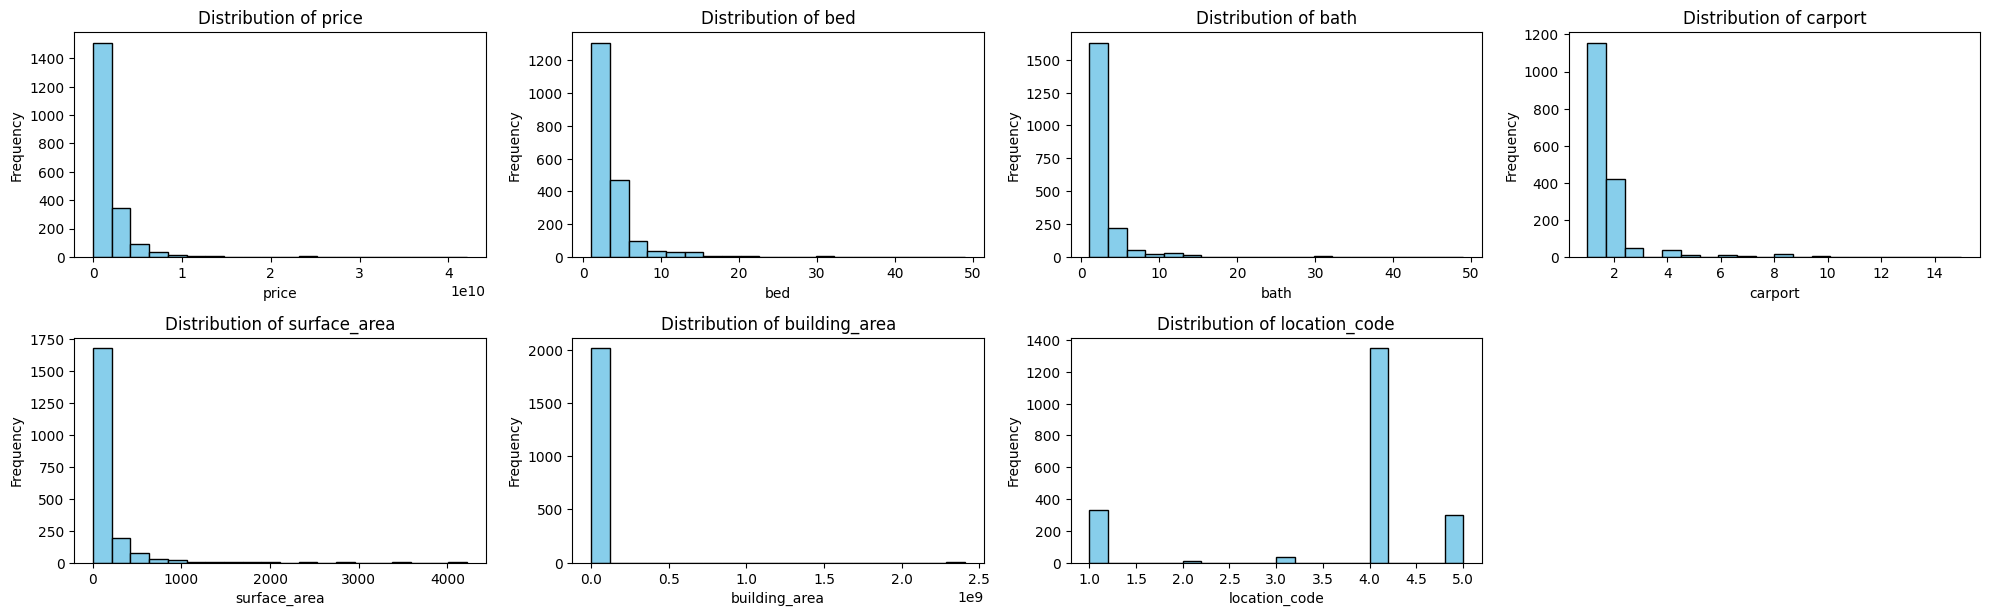

In [ ]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(5, 4, i + 1)
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#3. Memvalidasi Data

In [ ]:
df.isnull().sum()

,0
price,0
listing-location,0
bed,19
bath,21
carport,307
surface_area,1
building_area,1
location_code,0


In [ ]:
df['bed'] = df['bed'].fillna(df['bed'].mean())
df['bath'] = df['bath'].fillna(df['bath'].mean())
df['carport'] = df['carport'].fillna(df['carport'].mean())

df = df.dropna(subset=['surface_area', 'building_area'])

In [ ]:
df.isnull().sum()

,0
price,0
listing-location,0
bed,0
bath,0
carport,0
surface_area,0
building_area,0
location_code,0


#4. Membersihkan Data

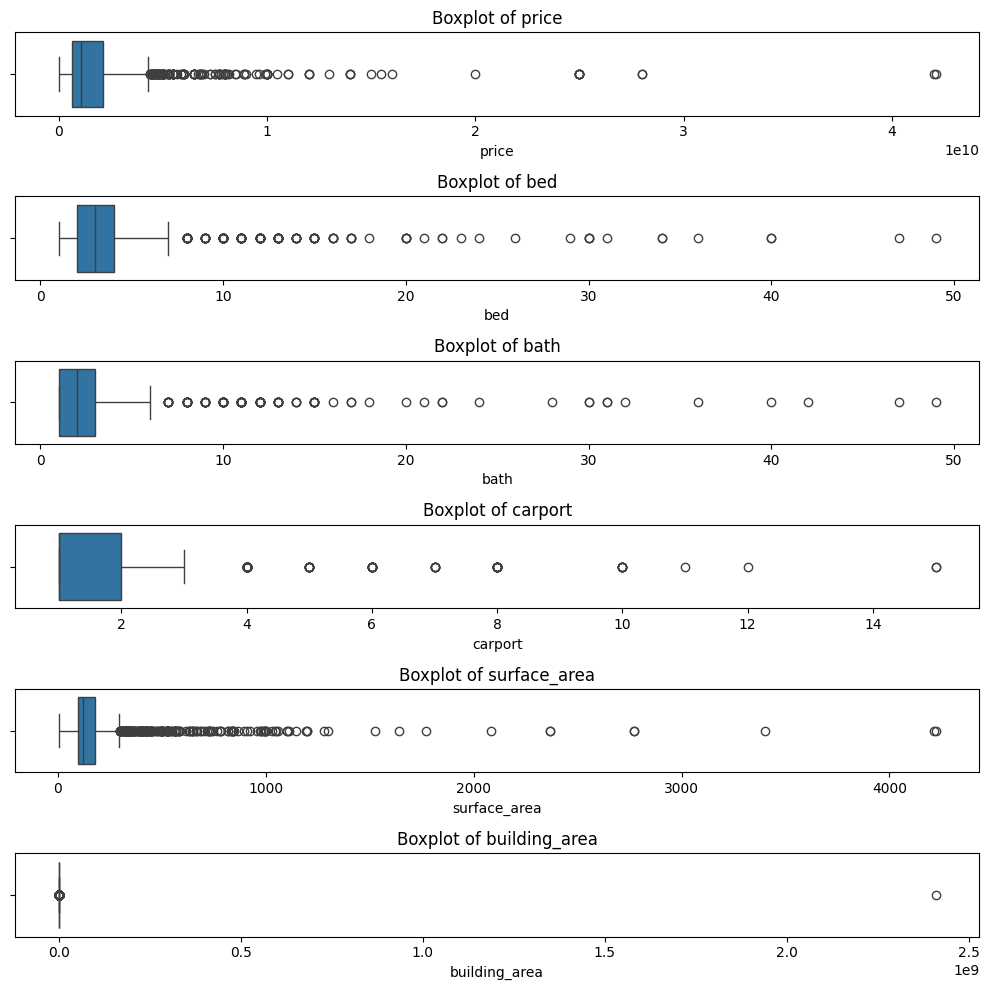

In [ ]:
num_col = df.drop(['location_code'],axis=1)
numerical_columns = num_col.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(10, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()

plt.show()

In [ ]:
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print(f"Jumlah data setelah menghapus outliers: {len(df)}")

Jumlah data setelah menghapus outliers: 1576


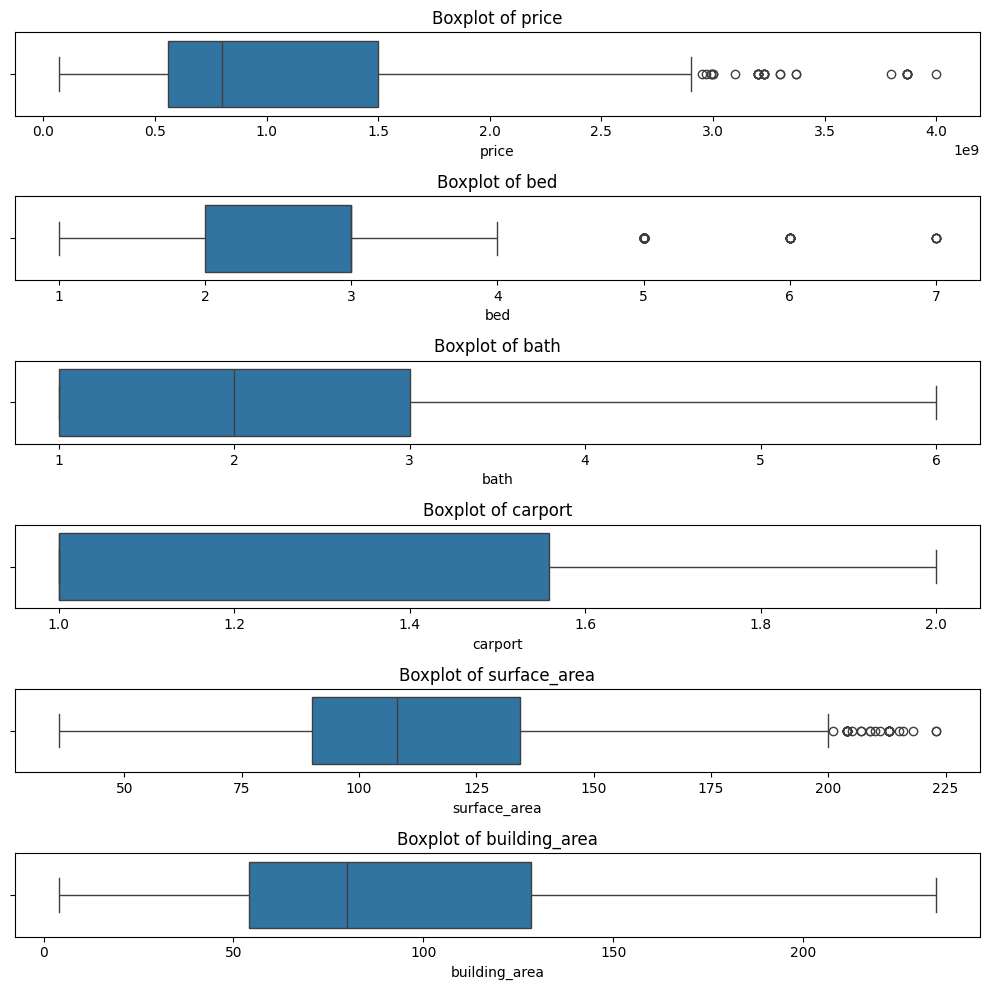

In [ ]:
num_col = df.drop(['location_code'],axis=1)
numerical_columns = num_col.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(10, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()

plt.show()

In [ ]:
df.reset_index(drop=True, inplace=True)
df

,price,listing-location,bed,bath,carport,surface_area,building_area,location_code
0,1.790000e+09,"Ngaglik, Sleman",3.0,3.0,2.0,120.0,110.0,4
1,1.700000e+08,"Jombor, Sleman",3.0,2.0,1.0,102.0,126.0,4
2,6.950000e+08,"Berbah, Sleman",2.0,2.0,1.0,100.0,100.0,4
3,5.600000e+08,"Prambanan, Sleman",3.0,1.0,1.0,109.0,67.0,4
4,2.000000e+08,"Moyudan, Sleman",2.0,1.0,1.0,60.0,30.0,4
...,...,...,...,...,...,...,...,...
1571,5.000000e+08,"Kalasan, Sleman",3.0,2.0,2.0,104.0,80.0,4
1572,7.500000e+08,"Gamping, Sleman",2.0,1.0,1.0,89.0,60.0,4
1573,7.560000e+08,"Ngaglik, Sleman",2.0,1.0,2.0,140.0,60.0,4
1574,1.780000e+09,"Depok, Sleman",4.0,3.0,2.0,118.0,160.0,4


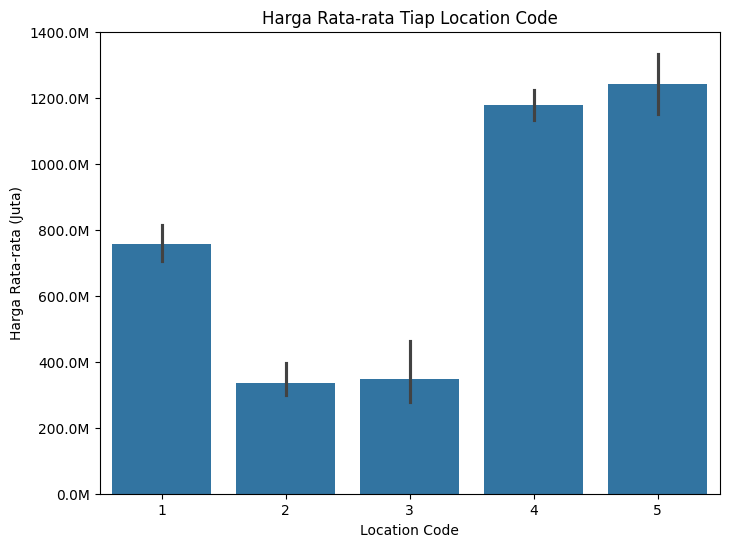

In [ ]:
def format_millions(x, _):
    return f'{x / 1e6:.1f}M'

location_map = {
    "Bantul": 1,
    "Gunung Kidul": 2,
    "Kulon Progo": 3,
    "Sleman": 4,
    "Kota Yogyakarta":5
}

df['location_name'] = df['location_name'] = df['location_code'].replace(location_map)

plt.figure(figsize=(8, 6))
sns.barplot(x='location_name', y='price', data=df, estimator=np.mean)

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_millions))

plt.title('Harga Rata-rata Tiap Location Code')
plt.xlabel('Location Code')
plt.ylabel('Harga Rata-rata (Juta)')
plt.show()

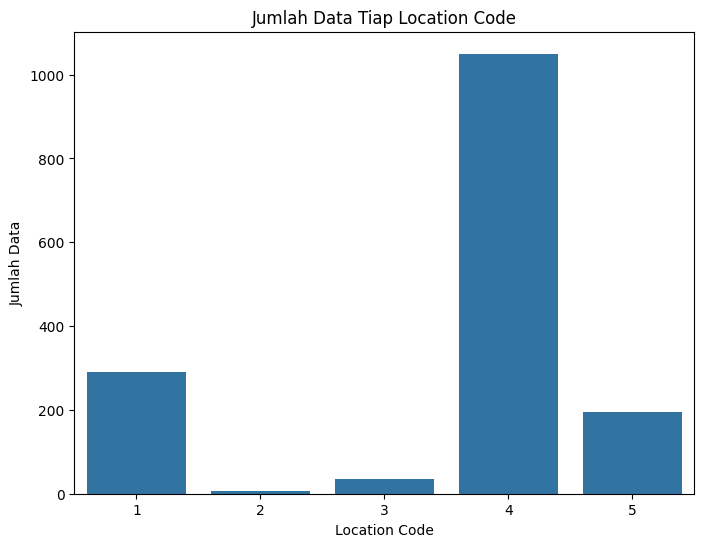

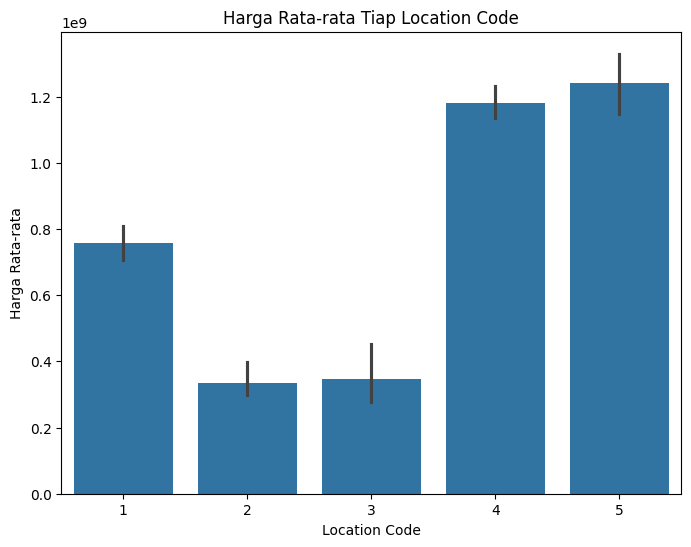

In [ ]:
# prompt: buat visualisasi jumlah data tiap location_code dan juga harga rata-rata tiap location_code

# Visualisasi jumlah data tiap location_code
plt.figure(figsize=(8, 6))
sns.countplot(x='location_code', data=df)
plt.title('Jumlah Data Tiap Location Code')
plt.xlabel('Location Code')
plt.ylabel('Jumlah Data')
plt.show()

# Visualisasi harga rata-rata tiap location_code
plt.figure(figsize=(8, 6))
sns.barplot(x='location_code', y='price', data=df, estimator=np.mean)
plt.title('Harga Rata-rata Tiap Location Code')
plt.xlabel('Location Code')
plt.ylabel('Harga Rata-rata')
plt.show()

#5. Mengkonstruksi Data

In [ ]:
scaler = StandardScaler()
area_columns = ['surface_area', 'building_area']

scaled_areas = scaler.fit_transform(df[area_columns])
df[area_columns] = scaled_areas
df


,price,listing-location,bed,bath,carport,surface_area,building_area,location_code
0,1.790000e+09,"Ngaglik, Sleman",3.0,3.0,2.0,0.129560,0.350093,4
1,1.700000e+08,"Jombor, Sleman",3.0,2.0,1.0,-0.381333,0.683613,4
2,6.950000e+08,"Berbah, Sleman",2.0,2.0,1.0,-0.438099,0.141643,4
3,5.600000e+08,"Prambanan, Sleman",3.0,1.0,1.0,-0.182652,-0.546242,4
4,2.000000e+08,"Moyudan, Sleman",2.0,1.0,1.0,-1.573418,-1.317507,4
...,...,...,...,...,...,...,...,...
1571,5.000000e+08,"Kalasan, Sleman",3.0,2.0,2.0,-0.324567,-0.275257,4
1572,7.500000e+08,"Gamping, Sleman",2.0,1.0,1.0,-0.750312,-0.692157,4
1573,7.560000e+08,"Ngaglik, Sleman",2.0,1.0,2.0,0.697220,-0.692157,4
1574,1.780000e+09,"Depok, Sleman",4.0,3.0,2.0,0.072794,1.392342,4


In [ ]:
location_dummy = pd.get_dummies(df['location_code'], prefix='location')
df = pd.concat([df, location_dummy], axis=1)
df = df.drop('location_code', axis=1)
df

,price,listing-location,bed,bath,carport,surface_area,building_area,location_1,location_2,location_3,location_4,location_5
0,1.790000e+09,"Ngaglik, Sleman",3.0,3.0,2.0,0.129560,0.350093,False,False,False,True,False
1,1.700000e+08,"Jombor, Sleman",3.0,2.0,1.0,-0.381333,0.683613,False,False,False,True,False
2,6.950000e+08,"Berbah, Sleman",2.0,2.0,1.0,-0.438099,0.141643,False,False,False,True,False
3,5.600000e+08,"Prambanan, Sleman",3.0,1.0,1.0,-0.182652,-0.546242,False,False,False,True,False
4,2.000000e+08,"Moyudan, Sleman",2.0,1.0,1.0,-1.573418,-1.317507,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1571,5.000000e+08,"Kalasan, Sleman",3.0,2.0,2.0,-0.324567,-0.275257,False,False,False,True,False
1572,7.500000e+08,"Gamping, Sleman",2.0,1.0,1.0,-0.750312,-0.692157,False,False,False,True,False
1573,7.560000e+08,"Ngaglik, Sleman",2.0,1.0,2.0,0.697220,-0.692157,False,False,False,True,False
1574,1.780000e+09,"Depok, Sleman",4.0,3.0,2.0,0.072794,1.392342,False,False,False,True,False


In [ ]:

X = df.drop(columns=['price','listing-location'], axis=1)
y = df['price']
y = np.log1p(df['price'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y

,price
0,21.305481
1,18.951309
2,20.359422
3,20.143447
4,19.113828
...,...
1571,20.030119
1572,20.435584
1573,20.443552
1574,21.299879


In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lr_model.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)
mae_lr = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse_lr}")
print(f"R-squared: {r2_lr}")
print(f"Mean Absolute Error: {mae_lr}")

Mean Squared Error: 0.12242856038724627
R-squared: 0.7453949219672653
Mean Absolute Error: 0.276350118684067


In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)

rf_mse = mean_squared_error(y_test, y_pred)
rf_r2 = r2_score(y_test, y_pred)
rf_mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {rf_mse}")
print(f"R-squared: {rf_r2}")
print(f"Mean Absolute Error: {rf_mae}")

Mean Squared Error: 0.04676796188499895
R-squared: 0.9027403365072767
Mean Absolute Error: 0.13671823566113483


In [ ]:
#SVM
from sklearn.svm import SVR

svm_model = SVR()
svm_model.fit(X_train, y_train)

SVR()

In [ ]:
y_pred = svm_model.predict(X_test)

svm_mse = mean_squared_error(y_test, y_pred)
svm_r2 = r2_score(y_test, y_pred)
svm_mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {svm_mse}")
print(f"R-squared: {svm_r2}")
print(f"Mean Absolute Error: {svm_mae}")

Mean Squared Error: 0.07717321745525785
R-squared: 0.8395089104202194
Mean Absolute Error: 0.2129368893730555


In [ ]:
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

In [ ]:
y_pred = gb_model.predict(X_test)

gb_mse = mean_squared_error(y_test, y_pred)
gb_r2 = r2_score(y_test, y_pred)
gb_mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {gb_mse}")
print(f"R-squared: {gb_r2}")
print(f"Mean Absolute Error: {gb_mae}")

Mean Squared Error: 0.07303217527743867
R-squared: 0.848120711159243
Mean Absolute Error: 0.19256915512606004
